# TD2: Enzyme kinetics
* Michaelis-Menten enzymatic reaction network
 * conservation laws
 * time scales
* Reduction to single reaction with Michaelis-Menten kinetics 
 * by quasi-steady state approximation (QSSA)
 * by quasi-equilibrium (QE) approximation

F. Fages, Jan 2019, Jan 2020, Jan 2021

## Henri-Michaelis-Menten enzymatic reaction CRN
* CRN of 3 reactions with mass action law kinetics

In [1]:
present(E,e). 
present(S,s). 
absent(C). 
absent(P).

In [2]:
k1*E*S for E+S => C.
k2*C for C => E+S.        
k3*C for C => E+P.

### Real parameter values 
* for the hydrolysis of benzoyl-L-arginine ethyl ester by trypsin (a protein of 247 amino acids)

In [3]:
parameter(k1=4e6, k2=25, k3=15). 

In [4]:
parameter(e=1e-8). 
parameter(s=1e-5). 

In [5]:
list_model.

E*S*k1 for E+S=>C.
C*k2 for C=>E+S.
C*k3 for C=>E+P.
initial_state(E=e).
initial_state(S=s).
absent(C).
absent(P).
parameter(
  k1 = 4000000.0,
  k2 = 25,
  k3 = 15,
  e = 1.0e-8,
  s = 1.0e-5
).

### Graphical views

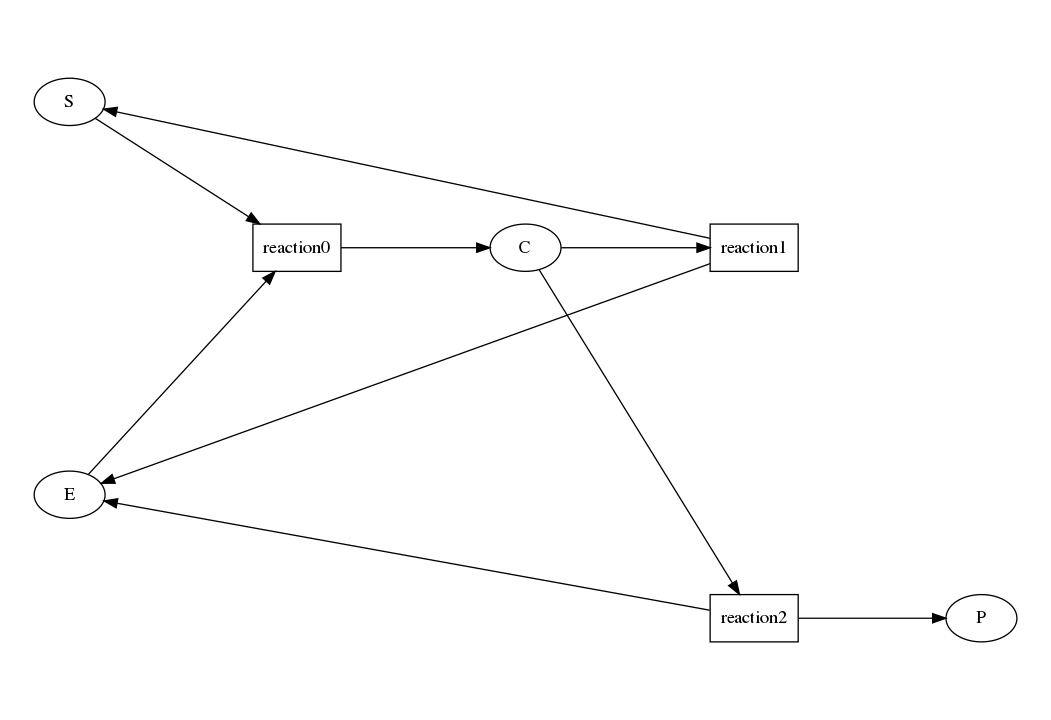

In [6]:
draw_reactions.

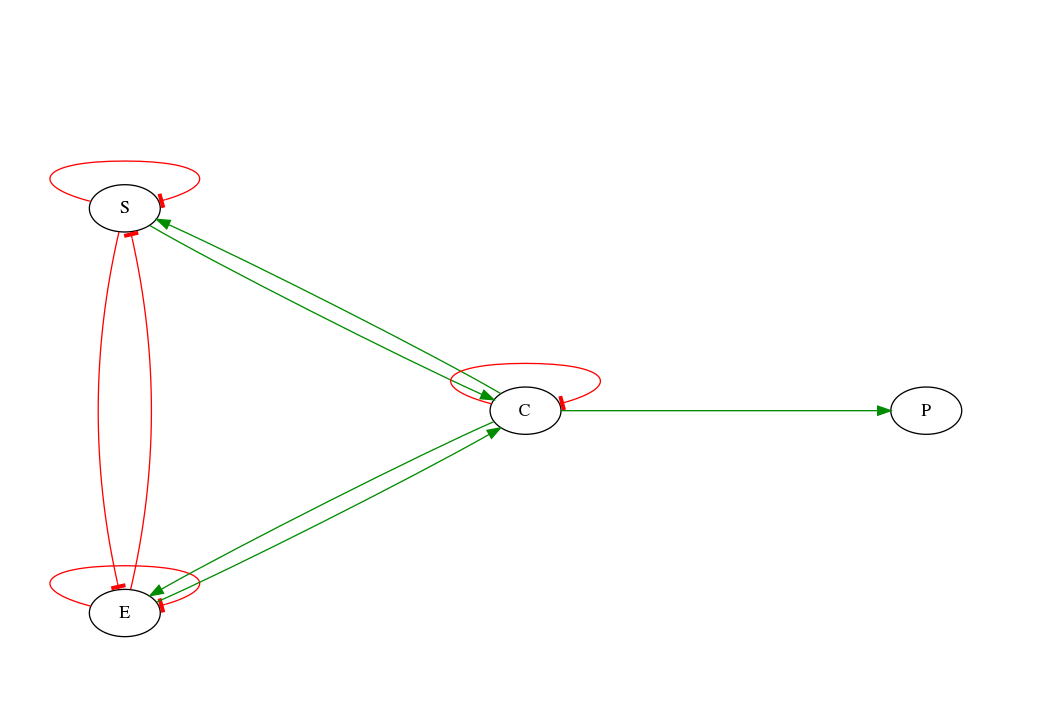

In [7]:
draw_influences.

### Ordinary Differential Equations

In [8]:
list_ode.

In [9]:
search_conservations.

C+E
C+P+S
2 complex invariant(s)

### Long time scale
* slow transformation of the substrate in the product

In [10]:
option(time:500).

In [11]:
numerical_simulation. plot.

### Short time scale
* Fast complexation of the enzyme on the substrate
* quasi constant concentrations of the enzyme and the complex after 0.1 units of time

In [12]:
numerical_simulation(time:0.1). plot(show:{E,C,P}).

In [13]:
numerical_simulation(time:1). plot(show:{E,C}).

In [14]:
plot(show: {E, C}, against: S).

## Henri-Michaelis-Menten kinetics
* Quasi-Steady State Approximation(QSSA) 
* Michaelis-Menten reduced reaction  `Vm*A/(Km+A) for A => B.`
* Vm=k3*z and Km=(k2+k3)/k1

In [15]:
present(A,s). 
absent(B).

In [16]:
function(Vm=k3*e).

In [17]:
function(Km=(k2+k3)/k1).

In [18]:
Vm*A/(Km+A) for A => B.

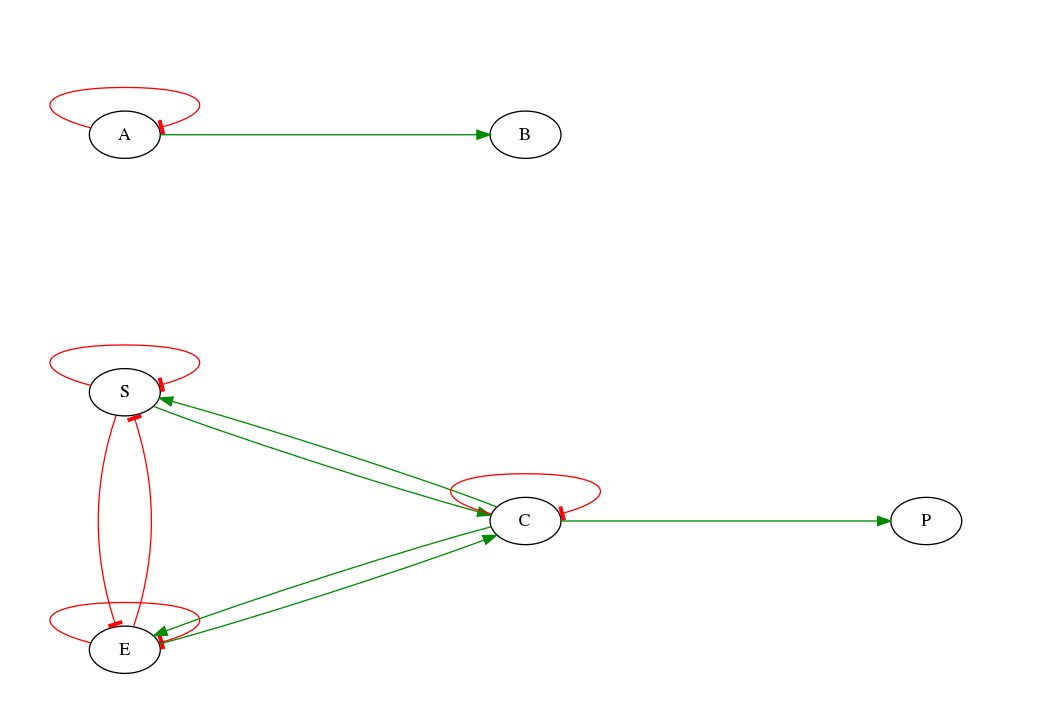

In [19]:
draw_influences.

In [20]:
list_model.

E*S*k1 for E+S=>C.
C*k2 for C=>E+S.
C*k3 for C=>E+P.
A*Vm/(A+Km) for A=>B.
initial_state(E=e).
initial_state(S=s).
absent(C).
absent(P).
initial_state(A=s).
absent(B).
parameter(
  k1 = 4000000.0,
  k2 = 25,
  k3 = 15,
  e = 1.0e-8,
  s = 1.0e-5
).
function(
  Vm = k3*e,
  Km = (k2+k3)/k1
).

In [21]:
list_ode.

### same behavior on the long time scale

In [22]:
option(show:{A,B,S,P}, time:500).

In [23]:
numerical_simulation. plot.

In [24]:
list_model.

E*S*k1 for E+S=>C.
C*k2 for C=>E+S.
C*k3 for C=>E+P.
A*Vm/(A+Km) for A=>B.
initial_state(E=e).
initial_state(S=s).
absent(C).
absent(P).
initial_state(A=s).
absent(B).
parameter(
  k1 = 4000000.0,
  k2 = 25,
  k3 = 15,
  e = 1.0e-8,
  s = 1.0e-5
).
function(
  Vm = k3*e,
  Km = (k2+k3)/k1
).

### Hyperbolic velocity

In [25]:
function(velocity1=k3*C). 
function(velocity2=Vm*A/(Km+A)).

In [26]:
numerical_simulation.
plot(show:{velocity1,velocity2}, against: A).

### small discrepancy on the short time scale
* slight over-approximation of the production at the begining: B > P
* due to over-approximation of the velocity at the start

In [27]:
numerical_simulation(time:0.1). plot(show:{E,C,P,B}).

In [28]:
plot(show:{velocity1,velocity2}, against: A).

# Questions

Change the values of the kinetic parameters and initial concentrations to evaluate the robustness of that approximation on the long time scale (500 units)


In [29]:
%slider k1 k2 k3 e s

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

1) to which parameters is the quality of the reduction sensitive ?

*write your answer here*

*...*

2) give conditions for the validity of the approximation

*write your answer here*

*...*


## Quasi-Equilibrium (QE) approximation

3) Implement the Quasi-Equilibrium reduced reaction `Vm*X/(Kd+X) for X => Y.` 
where Kd=k2/k1


4) compare the results with the QSSA approximation

*write your answer here*

*...*

5) to which kinetic parameters is the quality of the QE reduction sensitive ?

*write your answer here*

*...*